# Lecture 3: Data Visualization and Linear Regression

## 3/4/19

### Table of Contents
* [Matplotlib](#matplotlib)  
    * [Anatomy of a Plot](#anatomy)  
    * [Plots](#plots)  
        * [Line Plots](#line)    
        * [Formatting Plots](#formatting)
        * [Bar Plots](#bar)
        * [Histograms](#histogram)
        * [Scatterplots](#scatter)
        * [Pie Charts](#pie)
        * [Subplots](#subplot)
        * [Ticks](#ticks)
* [Regression](#regression)
    * [Introduction](#intro)
        * [What Is A Model?](#what_model)
        * [Why Make A Model?](#why_model)
        * [Categorical Variables](#categorical)
    * [Linear Regression](#linear_regression)
        * [Simple Linear Regression](#simple)
        * [Loss and the Line of Best Fit](#loss)
        * [Ordinary Least Squares](#ols)
        * [Making the Model](#making_model)
        * [Interpreting the Model](#interpreting_model)
        * [Assessing the Model](#assessment)
            * [Coefficient of Determination ($R^2$)](#r_squared)
            * [Residual Plots](#residual_plots)
        * [When Can I Use A Linear Model?](#when_to_use)
        * [Multiple Linear Regression](#multiple)


### Hosted by and maintained by the [Statistics Undergraduate Students Association (SUSA)](https://susa.berkeley.edu). Authored by [Rosa Choe](mailto:rosachoe@berkeley.edu) and [Alay Modi](mailto:alaymodi@berkeley.edu)

# Data Visualization

Last week you all learned about NumPy and Pandas, libraries that help you work with data efficiently as NumPy arrays/matrices and represent it in readable Pandas tables.

However, despite the better readability that Pandas provides and NumPy's tools to help you work with data efficiently, some patterns in data are hard to see when you're just looking at the raw data as numbers. A really helpful tool to discover patterns in data is *visualization*. As you might guess, this means *visualizing* your data through graphs

<a id='matplotlib'></a>

## Matplotlib

[Matplotlib](https://matplotlib.org/) is a Python library that allows you to create a variety of different types of plots and figures. The complexity of plots you can make in Matplotlib range from simple scatter plots to interactive 3d plots. We'll mostly be focusing on a specific module of Matplotlib called PyPlot, which was made to be the Python analog to Matlab's plotting functionality. 

<a id="anatomy"></a>

### Anatomy of a Plot

First things first, we will discuss what makes up a plot in Matplotlib, to establish some vocabulary for what we will be doing throughout this lecture.

In [1]:
import matplotlib.pyplot as plt

# creates a plot
plt.plot()

# displays plot
plt.show()

<Figure size 640x480 with 1 Axes>

This is what a general plot looks like in Matplotlib. Currently, it's not very interesting, since there's no data in it, but what we see so far is the *figure*, which is basically the canvas for whatever data we would want to plot. Like graphs you're probably familiar with, the horizontal edge is the *x-axis*, and the vertical edge is the *y-axis*. The numbered lines along the axes are called *ticks*. 

Below is an image of a more complex figure, labeled with all of the different parts of a Matplotlib figure. A cool tidbit is that all of this (including the information about the figure) was made in Matplotlib, using a lot of the tools we'll be learning today.

<img src='https://matplotlib.org/_images/anatomy.png' style='width: 500px; height: 500px'></img>

As you can see above, the *figure* is the canvas in which the plot lies, and what we would usually call a plot (or graph) is called the *axes*. We generally won't work with the `figure` object, but one thing we can do with the `figure` object is resizing our plots.

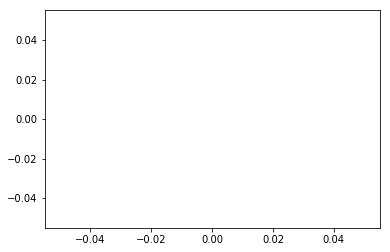

In [2]:
plt.figure()
plt.plot()
plt.show()

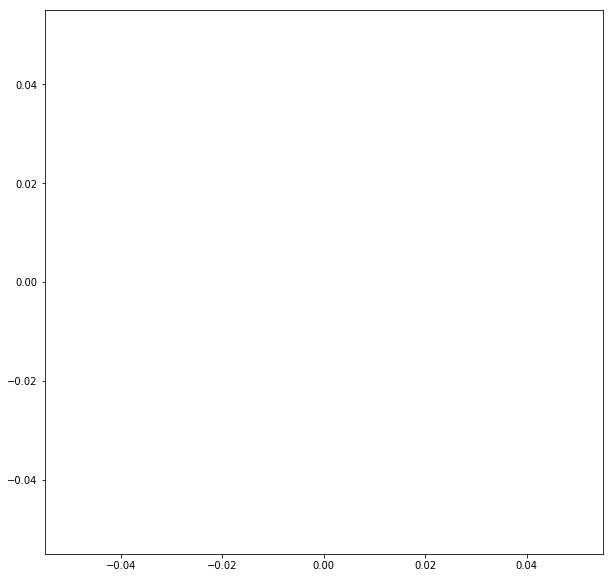

In [3]:
plt.figure(figsize=(10, 10))
plt.plot()
plt.show()

<a id='plots'></a>

## Plots

<a id='line'></a>

### Line Plots

The most basic type of plot in Matplotlib is a line plot. It is created using the `plt.plot()` function that we used above. To get a line graph, all we need to do is pass in some data as an argument! This can be in the form of a NumPy array or a regular Python list, so let's try it out!

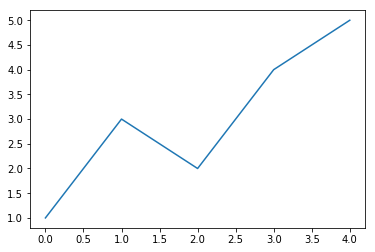

In [4]:
plt.plot([1, 3, 2, 4, 5])
plt.show()

This is one way to use `plt.plot()`, by passing in a single array representing the y-values you want to plot. You can use the `shift+tab` trick to see what arguments `plt.plot()` takes in. When you plot values in this way, it will automatically assign x-values as a range from 0 up to the length of the y-values you passed in.

If you want to define the x-values, you can just pass them in as the first argument, so you have the option of calling plot in either of the following ways:
    
    plt.plot(y_values)
    plt.plot(x_values, y_values)

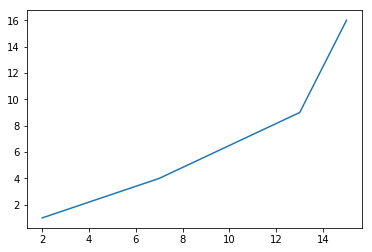

In [5]:
plt.plot([2, 7, 13, 15], [1, 4, 9, 16])
plt.show();

As is, it's hard to tell what we're plotting here. Although this is made up data, if we were making a plot with real data, we would want to label our axes and give the plot a title so other people looking at it would have context as to what we were plotting. We can add labels and a title in the following way:

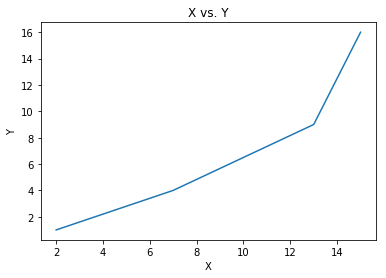

In [6]:
plt.plot([2, 7, 13, 15], [1, 4, 9, 16])
plt.title('X vs. Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show();

In [7]:
import pandas as pd 
import numpy as np

titanic_train = pd.read_csv('titanic/train.csv')
titanic_test = pd.read_csv('titanic/test.csv')

**Practice:** Make a plot of the first 5 values of `Age` from the `titanic_train`. Don't forget to label your axes and give your graph a title.

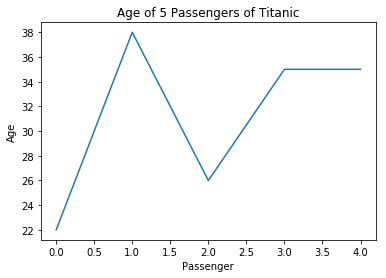

In [8]:
plt.plot(titanic_train['Age'][:5])
plt.xlabel('Passenger')
plt.ylabel('Age')
plt.title('Age of 5 Passengers of Titanic')
plt.show();

<a id='formatting'></a>

#### Formatting Plots

What if you wanted to make your line red instead of blue? Or dashed? Pyplot has a built in feature for formatting your plots, in the form of a *format string* as an optional argument to any plot function. Format strings are of the form:

    fmt = '[color][marker][line]'

Each of these are represented by a character (or two), and each is optional. Here are some examples of options for formatting. For a more complete list of options check out the **Notes** section at [this link](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- color: sets color
    - `b` blue
    - `b` green
    - `r` red
- marker: sets the shape of points (for scatter plots)
    - `.` point
    - `o` circle
    - `*` star
- line: sets the style of the line
    - `-` solid line
    - `--` dashed line
    - `:` dotted line

**Practice:** Edit the previous plot to have a dashed line with circles on each data point.

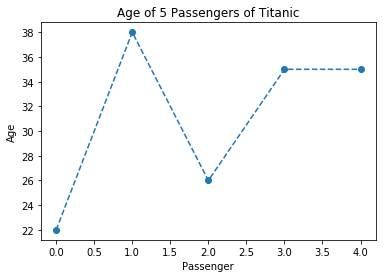

In [9]:
plt.plot(titanic_train['Age'][:5], 'o--')
plt.xlabel('Passenger')
plt.ylabel('Age')
plt.title('Age of 5 Passengers of Titanic')
plt.show();

<a id='bar'></a>

### Bar Plots

We can make bar plots by using the `plt.bar()` function.

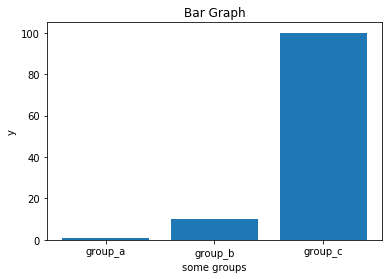

In [10]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)

plt.title('Bar Graph')
plt.xlabel('some groups')
plt.ylabel('y')

plt.show();

**Practice:** Make a bar plot of the counts of people who survived versus people who didn't survive. The counts are provided for you below

In [11]:
survived_counts = titanic_train.groupby('Survived').size()
survived_counts

Survived
0    549
1    342
dtype: int64

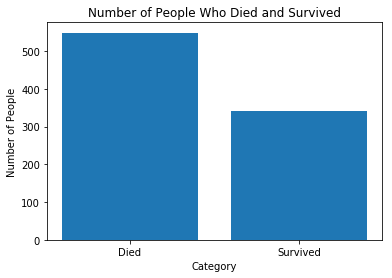

In [12]:
plt.bar(['Died', 'Survived'], survived_counts)

plt.title('Number of People Who Died and Survived')
plt.xlabel('Category')
plt.ylabel('Number of People')

plt.show();

<a id='histogram'></a>

### Histograms

You can make a histogram using `plt.hist()`.

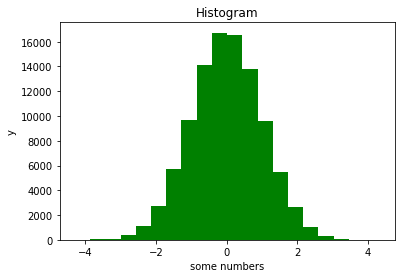

In [13]:
N_points = 100000
n_bins = 20

x = np.random.randn(N_points)
plt.hist(x, bins = n_bins, color = "g")
plt.title('Histogram')
plt.xlabel('some numbers')
plt.ylabel('y')
plt.show();

**Practice:** Make a histogram of the fare prices paid by the passengers of the Titanic.

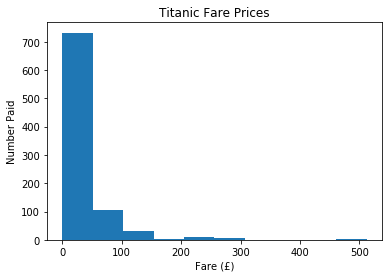

In [14]:
plt.hist(titanic_train['Fare'])
plt.title('Titanic Fare Prices')
plt.xlabel('Fare (£)')
plt.ylabel('Number Paid')
plt.show();

<a id='scatter'></a>

### Scatterplots

`plt.scatter()` makes scatter plots.

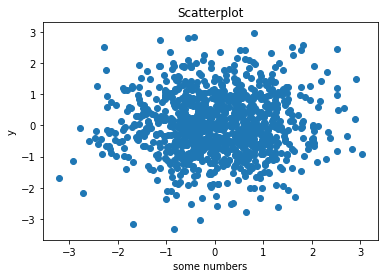

In [15]:
N_points = 1000
x = np.random.randn(N_points)
y = np.random.randn(N_points)
plt.scatter(x,y)

plt.title('Scatterplot')
plt.xlabel('some numbers')
plt.ylabel('y')
plt.show();

**Practice:** Make a scatterplot of `Age` versus `Fare`.

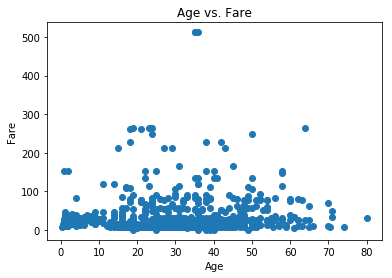

In [16]:
plt.scatter(titanic_train['Age'], titanic_train['Fare'])
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show();

<a id='pie'></a>
### Pie Charts

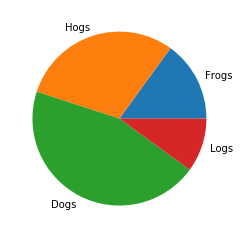

In [17]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
plt.pie(sizes, labels=labels)
plt.show();

**Practice:** Make a pie chart of the proportions of people who survived by class. The data is provided in the `proportion_survived` variable.

In [18]:
proportion_survived = titanic_train.groupby('Pclass')['Survived'].mean()
proportion_survived

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

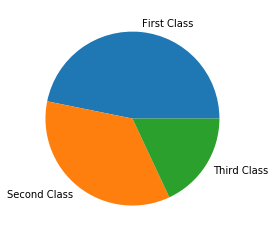

In [19]:
plt.pie(titanic_train.groupby('Pclass')['Survived'].mean(), labels=['First Class', 'Second Class', 'Third Class'])
plt.show();

If you want to get more practice making plots on Matplotlib, or would like some additional resources for the functionality of Matplotlib, take a look [here](https://matplotlib.org/tutorials/index.html)

<a id='subplots'></a>
### Subplots

Each figure object can hold multiple plots. Each of these are called *subplots* and can be created using the `plt.subplot()` function.

    plt.subplot({nrows}, {ncols}, {index})
    plt.subplot('{nrows}{ncols}{index}')
    
- `nrows` number of rows of subplots you want in your figure
- `ncols` number of columns of subplots you want in your  figure
- `index` index of the current subplot you're working on
    - increases from left to right, top to bottom starting at 1

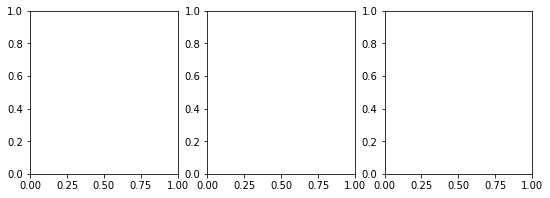

In [20]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.subplot(1, 3, 2)
plt.subplot(1, 3, 3)
plt.show();

In [131]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(3, 9))

plt.subplot(3,1,1)
plt.bar(names, values)

plt.subplot(312)
plt.scatter(names, values)

plt.subplot(313)
plt.plot(names, values)

plt.suptitle('Categorical Plotting')
plt.show();

**Practice:** Make a figure with 3 subplots comparing the number of people who survived by gender. Make a bar plot, line plot, and scatter plot. The data has been provided below.

In [22]:
sex_survival = titanic_train.groupby('Sex')['Survived'].count()
sex_survival

Sex
female    314
male      577
Name: Survived, dtype: int64

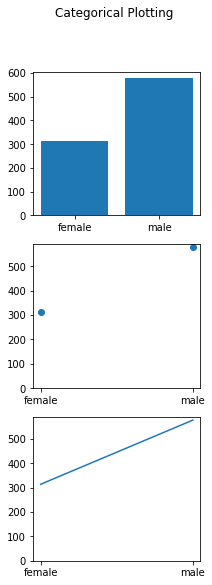

In [23]:
names = sex_survival.index

plt.figure(1, figsize=(3, 9))

plt.subplot(3,1,1)
plt.bar(names, sex_survival)

plt.subplot(312)
plt.scatter(names, sex_survival)
plt.ylim(0, plt.ylim()[1])

plt.subplot(313)
plt.plot(names, sex_survival)
plt.ylim(0, plt.ylim()[1])

plt.suptitle('Categorical Plotting')
plt.show();

<a id='ticks'></a>
### Ticks

So far, the ticks have been set automatically, but we can also set these ourselves if we want to rename them or set our custom values. For example, in our original plot of passenger ages, Pyplot automatically set the x-ticks to increase by `0.5`. This doesn't really make sense, since the unit `Passenger` doesn't increase in decimal increments. We can modify ticks using `plt.xticks()` and `plt.yticks()`.

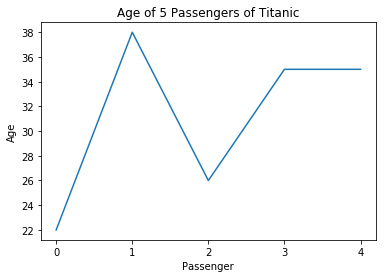

In [24]:
plt.plot(titanic_train['Age'][:5])
plt.xlabel('Passenger')
plt.ylabel('Age')
plt.title('Age of 5 Passengers of Titanic')

plt.xticks(range(5))
plt.show();

We can also relabel the ticks by setting the `labels` argument.

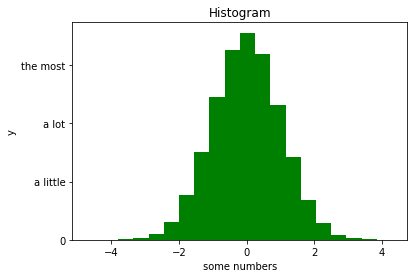

In [25]:
N_points = 100000
n_bins = 20

x = np.random.randn(N_points)
plt.hist(x, bins = n_bins, color = "g")
plt.title('Histogram')
plt.xlabel('some numbers')
plt.ylabel('y')

plt.yticks(ticks=5000*np.arange(4), labels=[0, 'a little', 'a lot', 'the most'])
plt.show();

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from plotting import overfittingDemo, plot_multiple_linear_regression
from scipy.optimize import curve_fit

<a id='intro'></a>
## Introduction
Imagine you've just met an alien who is on a mission to catalog and describe all life on Earth. They've asked you to describe what a "horse" is. How would you describe this to them?

<a id='what_model'></a>
### What Is A Model?
A model is a simplification of reality. You want it to be general enough that it can accurately describe more than just a handful of examples of what it's supposed to represent.

<table bgcolor=white><tr>
    <td><img src='model_reality.png' width=400 /></td>
    <td width=100></td>
    <td><img src='model_reality_2.png' width=400 /></td>
</tr></table>

Besides describing classes of things, like *horse*, *orange tabby cat*, or *genders*, models can also describe the relationship between things. Some of these might be familiar to you:
<table>
    <tr><td>Newton's Second Law</td><td>$F = ma$</td></tr>
    <tr><td>Hooke's Law</td><td>$F = -kx$</td></tr>
    <tr><td>Position of a falling ball</td><td>$y(t) = \frac{1}{2}at^2$</td></tr>
</table>

<a id='why_model'></a>
### Why Make A Model?
The examples above may give you an idea of what kinds of models you'd want to make. You could make a model to describe something, whether that be a class of objects, like cats, or the relationship between multiple things, like mass, acceleration and force in Newton's Second Law. Once you have a model, you might want to use it to make predictions. As an example, maybe you'd like to be able to make a good guess for someone's weight based on their height – you could make a model that describes the relationship between weight and height and use that model to predict weights.

There's one thing you should always keep in mind! Just because you can make a model describing the relationship between two variables, and even if you can use this model to predict the value of one variable based on the value of the other, it doesn't mean that one causes the other. You may have heard this before as the difference between **correlation** and **causation**. A classic example is the relationship between ice cream sales and murder rates. Turns out, when ice cream sales rise, so do murder rates. Does this mean ice cream *causes* people to commit murder? Or get murdered? Nope!

Today, we're going to learn how to make a linear model to describe the relationship between variables.

<a id='categorical'></a>
### Categorical Variables
In order to make any model, we first need data. Some types of data are more appropriate for linear models, so let's talk about different types of variables. 

- **categorical/qualitative**: a variable that has discrete values that represent *categories*
    - **ordinal**: a categorical variable whose categories have a clear *ordering*, so the categories have numerical meaning
        - e.g. `first class`, `second class`; `elementary school`, `middle school`, `high school`
    - **nominal**: a categorial variable whose categories exist by *name* only, with no inherent numerical value or ordering
        - e.g. `female`, `male` 
- **quantitative**: a variable that's measured on a numeric scale
    - **continuous**: a quantitative variable that can take on an infinite number of values
        - e.g. `weight`, `temperature`
    - **discrete**: a quantitative variable that can only take on certain values
        - e.g. `birth year`, `number of children`

We'll come back to these terms later.

<a id='linear_regression'></a>
## Linear Regression
**Linear regression** is a method of making linear models. Linear models is one kind of model, in which the relationship between the explanatory variables and the response variable can be described by a linear function. For now, you can just think of a linear function as a straight line, which takes us to *simple linear regression*.

<a id='simple'></a>
### Simple Linear Regression
**Simple linear regression** is a special case of linear regression in which you only have one explanatory variable. As the name suggests, it models the relationship as a *line*. You may be familiar with the slope-intercept form of a line, and that's exactly how the linear model looks!

$$y = mx+b$$

Here, $y$ is the **response** or **dependent** variable we're trying to predict, and $x$ is an **explanatory** or **independent** variable used to predict $y$. In the case of our weight and height example, $y$ would represent weight, while $x$ represents height.

Using known $x$'s, we want to accurately predict $y$ using the right $m$ and $b$.


<a id='loss'></a>
### Predicting the Line of Best Fit
To find our parameters, m & b, we define a *loss function*. The **loss function** measures how far off our model's estimated values are from the true values, or the *error* of our model.

Creating accurate models require minimizing the error or loss when predicting values. Another name for the line that minimizes the error is the **line of best fit**. It's a pretty descriptive name, since it's the line that fits our data the best. The *loss function* helps us define what is *best fit*. 

<img src='simple_linear.png' width=400>


<a id='ols'></a>
### Minimizing the Error
Our goal is to minimize the **residual** or the  difference between the predicted value and the observed value for a given $x$
For linear regression, we use the method of **ordinary least squares (OLS)**, which minimizes the sum of squared residuals. 

$$ \underbrace{e_{i}}_{error} = \underbrace{y_i}_{actual} - \underbrace{\hat{y_i}}_{predicted} = y_i - mx_i - b$$

**Question**: Can you think of why we would want to *square* the residuals and sum them instead of just minimizing their sum?


Since we want to minimize the **residual sum of squares (RSS)**, what we're actually going to minimize is this:

$$\textit{RSS} = \sum_{i=0}^n {e_i}^2 = \sum_{i=0}^n (y_i - mx_i - b)^2$$

By minimizing this function, we can solve for slope $m$ and the intercept $b$. The actual calculations for deriving the formulas that define these coefficients requires a bit of calculus, so we'll skip that part for now, but if you want to look into it more on your own you can check out [this link](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)! For now, we'll just tell you that $m$ and $b$ can be solved as:

$$\begin{aligned}
\hat{b}&=\bar {y}-\hat{m}\,{\bar{x}},\\
\hat{m}&=\frac{\sum _{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar {y})}{\sum _{i=1}^{n}(x_{i}-\bar{x})^2}\\
\end{aligned}$$

This is pretty complicated! Luckily, you don't need to know any of this to make a linear model, but this is here for reference if you're interested in the math behind what we'll be getting into today. 

<a id='making_model'></a>
### Making the Model
In linear regression, the response variable should be continuous. The explanatory variables *can* be discrete and even categorical, and in a future lecture you'll learn how to use categorical variables in your models, but in simple linear regression they need to be continuous. For today we'll just be working with continuous variables! 

Let's revisit the `titanic` dataset you're familiar with and decide whether it's appropriate for making a simple linear regression model.

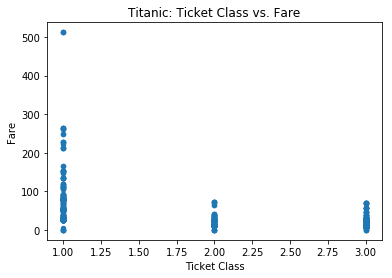

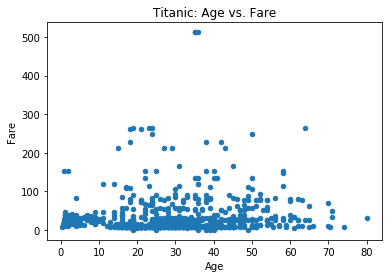

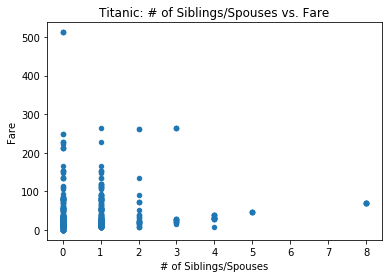

In [35]:
# reading the titanic data from excel sheet
titanic_df = pd.read_csv('titanic/train.csv')

# plotting ticket class vs. fare
titanic_df.plot.scatter("Pclass", "Fare")
plt.title("Titanic: Ticket Class vs. Fare")
plt.xlabel("Ticket Class")
plt.ylabel("Fare")

# plotting age vs. fare
titanic_df.plot.scatter("Age", "Fare")
plt.title("Titanic: Age vs. Fare")
plt.xlabel("Age")
plt.ylabel("Fare")

# plotting number of siblings vs. fare
titanic_df.plot.scatter("SibSp", "Fare")
plt.title("Titanic: # of Siblings/Spouses vs. Fare")
plt.xlabel("# of Siblings/Spouses")
plt.ylabel("Fare");

**Question:** How would you describe these variables?

Run the cell below to find the new dataset we found to work with!

In [36]:
mpg = pd.read_csv("./mpg.csv", index_col="name") # load mpg dataset
mpg = mpg.loc[mpg["horsepower"] != '?'].astype(int) # remove columns with missing horsepower values
mpg_train, mpg_test = train_test_split(mpg, test_size = .2, random_state = 0) # split into training set and test set
mpg_train, mpg_validation = train_test_split(mpg_train, test_size = .5, random_state = 0)
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
toyota corolla,34,4,108,70,2245,16,82,3
buick century,17,6,231,110,3907,21,75,1
cadillac eldorado,23,8,350,125,3900,17,79,1
bmw 320i,21,4,121,110,2600,12,77,2
ford fairmont futura,24,4,140,92,2865,16,82,1


Here we've chosen the `mpg` dataset, which tells us various attributes of different cars, including a car's make and model, miles per gallon, number of cylinders, weight, and more! We're going to be trying to see which features affect a car's `mpg`, and our goal is to create a model that accurately predicts `mpg` given other attributes of the car. 

You'll notice that we separated the `mpg` data into two separate dataframes, `mpg_train` and `mpg_test`. We'll get into why in another lecture, but for now, make sure to do all of your analysis and model creation on the `mpg_train` dataset! 


*Hint:* Hitting `shift-tab` with the cursor on the name of a function will bring up helpful documentation about how to use the function

Since we are looking at the dat a for cars, what could be a useful variable to predict?
Furthermore, to predict this variable, what explanatory or response variable should we use?

In [37]:
x1 = "displacement"
y1 = "mpg"

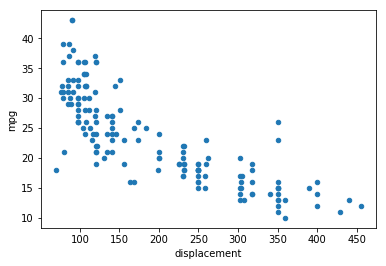

In [38]:
mpg_train.plot.scatter(x1,y1)

`sklearn`'s `linear_model` module makes it really easy to make linear models! There's a lot of different types of linear models implemented in the `linear_model` module, which you can take a look at [here](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) if you're interested, but for today we'll be using `LinearRegression`, which we've imported for you in the cell below. Try reading the documentation to figure out what the `fit()` function expects as input to correctly fit our model to the `mpg_train` data!

In [39]:
from sklearn.linear_model import LinearRegression

In [144]:
Y.shape

(156, 1)

In [143]:
# Initialize our linear regression model
linear_model = LinearRegression()

X = mpg_train[["displacement"]]
Y = mpg_train[["mpg"]]

# Fit the model to the data
linear_model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Once you've got it working you'll notice that it seems like nothing happened. However, behind the scenes, our `linear_model` variable has now been fit to the data we passed into the `fit()` function! We can see what the `slope` and `intercept` are by looking into the `coef_` and `intercept_` attributes of our `linear_model`.

In [152]:
linear_model.coef_, linear_model.intercept_

(array([[-0.06129822]]), array([ 35.20358341]))

You might notice that, while the `intercept_` is a single scalar value, `coef_` returns an array. This is because you can choose to fit your model to multiple explanatory variables (hence the list form of `feature_cols`). When you define multiple explanatory variables, the `coef_` will contain a separate coefficient for each explanatory variable you chose! You'll be able to explore that in a bit, but for now let's take a look at what our linear model looks like relative to our original data.

We've provided the skeleton for a helper function called `overlay_simple_linear_model`. Try to fill out the function so that it plots a scatterplot with the linear model overlaid on top.

*Hint:* If you press `tab` after a `[object].` or `[package].`, Jupyter will show you a list of valid functions defined for that object type or package.

In [153]:
def overlay_simple_linear_model(data, x_name, y_name, linear_model):
    """
    This function plots a simple linear model on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs linear model overlaid on scatterplot
    """
    
    x = np.arange(max(data[x_name])).reshape(-1, 1) # a 2D array of integers between 0 and the maximum value of the x_name column
    y = linear_model.predict(x) # replace ___ with correct function 
    
    
    data.plot.scatter(x_name, y_name) # scatter plot of x_name vs. y_name
    
    plt.plot(x, y, color='red')
    plt.title("Linear Model vs. Data: " + x_name + " vs. " + y_name)
    plt.show()

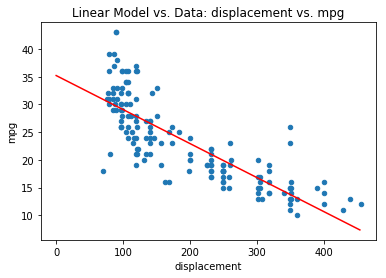

In [43]:
# If you wrote the function above correctly, the output should look like this
overlay_simple_linear_model(mpg_train, "displacement", "mpg", linear_model)

<a id='interpreting_model'></a>
### Interpreting the Model

You're probably thinking "COOL! This looks like a pretty good representation of the data! But what do these coefficients even mean?" That is a great question! As you might have guessed, the `intercept` term is where our line intersects with the y-axis, or when our predictor variable has a value of 0. In relation to our model, it's our prediction for `mpg` given a predictor variable value of 0. The `slope` term is a little more complicated. Yes, it is the slope of the line, but how do we interpret it in the relationship between `mpg` and our explanator?

<a id='assessment'></a>
### Assessing the Model
<a id='r_squared'></a>
#### Coefficient of Determination ($R^2$)
Another question you might have is, how do we know how good our model is? One way of measuring how well your model fits the data is the $R^2$ coefficient, or the **coefficient of determination**. Basically, what the $R^2$ represents is how much can our data vary but still be predicted accurately by the explanatory variable. If you want to look into the mathematical definition of $R^2$, you can check out the [Wikipedia page](https://en.wikipedia.org/wiki/Coefficient_of_determination).

We can obtain our model's $R^2$ value by using our `linear_model`'s `score()` function, like so:

In [154]:
linear_model.score(X, Y) # you'll only need to use variables that we've already defined

0.66001466276601861

Woohoo! If you used `displacement`, our model accurately predicts 66% of the variation in `mpg`. Is this good? Since $R^2$ is a proportion, it's value is always between $0$ and $1$. 

**Question:** What does it mean for $R^2$ to have a value of 1? What about 0?

An $R^2$ value of $1$ means that our model perfectly fits our data! So, the closer our $R^2$ value is to $1$, the better it fits our data.

An $R^2$ value of $0$ would mean that none of the variation of $y$ is explained by $x$. The explantory variable we chose then is useless. It does not explain anything about the data

In the cell below, try making different simple linear models using different functions and seeing their corresponding $R^2$. Make sure to stick with one explanatory variable for now!

**Exercise:** Can you think of a possible feature you could use to make our model have an $R^2$ value of $1$?

In [45]:
linear_model2 = LinearRegression()

X2 = mpg_train[["mpg"]]

linear_model2.fit(X2, Y)

linear_model2.score(X2, Y)

1.0

<a id='residual_plots'></a>
#### Residual Plots
Another way of analyzing your model is through *residual plots*. A **residual plot** is kind of what you'd think – it plots your residuals against the corresponding $x$ values. If you see interesting patterns in your residual plot, it's indicative of some *bias* in your model – your error isn't due to randomness in the data but because of an underlying problem in the way you've defined the relationship between your variables. 

Fill in the blanks in the `plot_simple_residuals()` function, so we can take a look at the residual plot.

In [155]:
def plot_simple_residuals(data, x_name, y_name, linear_model):
    """
    This function plots a residual plot based off of a simple linear model 
    on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs residual plot resulting from linear model overlaid on scatterplot
    """
    X = data[[x_name]].values
    Y = data[[y_name]].values
    residuals = Y - linear_model.predict(X)
    
#     axes = plt.gca()
    plt.scatter(X, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title("Residual Plot: " + x_name + " vs. " + y_name)
    plt.xlabel(x_name)
    plt.ylabel("Residuals")
    plt.show()

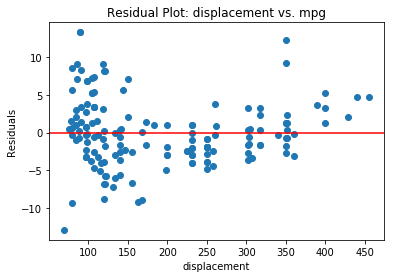

In [47]:
plot_simple_residuals(mpg_train, 'displacement', 'mpg', linear_model)

As you can see, the residuals aren't scattered randomly around the y-axis. The points are more spread out vertically for smaller values of `displacement` and less scattered vertically for larger values. Furthermore, in the middle the residuals are mostly above the line, while on the left and right side, the residuals tend to be below the line. Such a pattern as this one suggests that our model isn't that great at describing the relationship between `displacement` and `mpg`, and there's some fundamental issue with the assumption that the relationship can be modeled by a simple linear relationship. [Here](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)'s some more information about how to interpret different patterns in residual plots and how you can change your model to fix these errors.

<a id='when_to_use'></a>
### When Can I Use a Linear Model?
Let's talk about some of the assumptions of linear regression, so you know when it's appropriate to use one. 
- There's a linear relationship between the response variable and the explanatory variables.
- There's no pattern in the residual plot.

Now that you're a master of simple linear regression, you're probably thinking "WHY CAN'T I USE MORE EXPLANATORY VARIABLES? What if I think `mpg` could be better predicted if I knew *two* of the variables? Wouldn't that make my model better?" Why, Ms/Mr. Genius Statistician, you *can* use more explanatory variables! That leads us to *multiple linear regression*.

<a id='multiple'></a>
## Multiple Linear Regression
**Multiple linear regression** is an extension to the simple linear regression model with multiple explanatory variables instead of just one.

With two explanatory variables, we can still visualize the model in a three-dimensional graph, but as we add more and more variables it's pretty much impossible to plot it (can you imagine what a 5D graph would look like?). 

Below is a code chunk that plots the scatterplots of `weight` and `displacement` against `mpg`, as well as the corresponding linear model. It's interactive, so you can drag it around to get a better look at how the model fits the data!

You'll notice that the model is no longer a line – it's a plane. This is the 3D analog to a line. Just as a line defines one value for $y$ for any given $x$, a plane defines one value for $z$ for any pair of $(x, y)$.

<IPython.core.display.Javascript object>


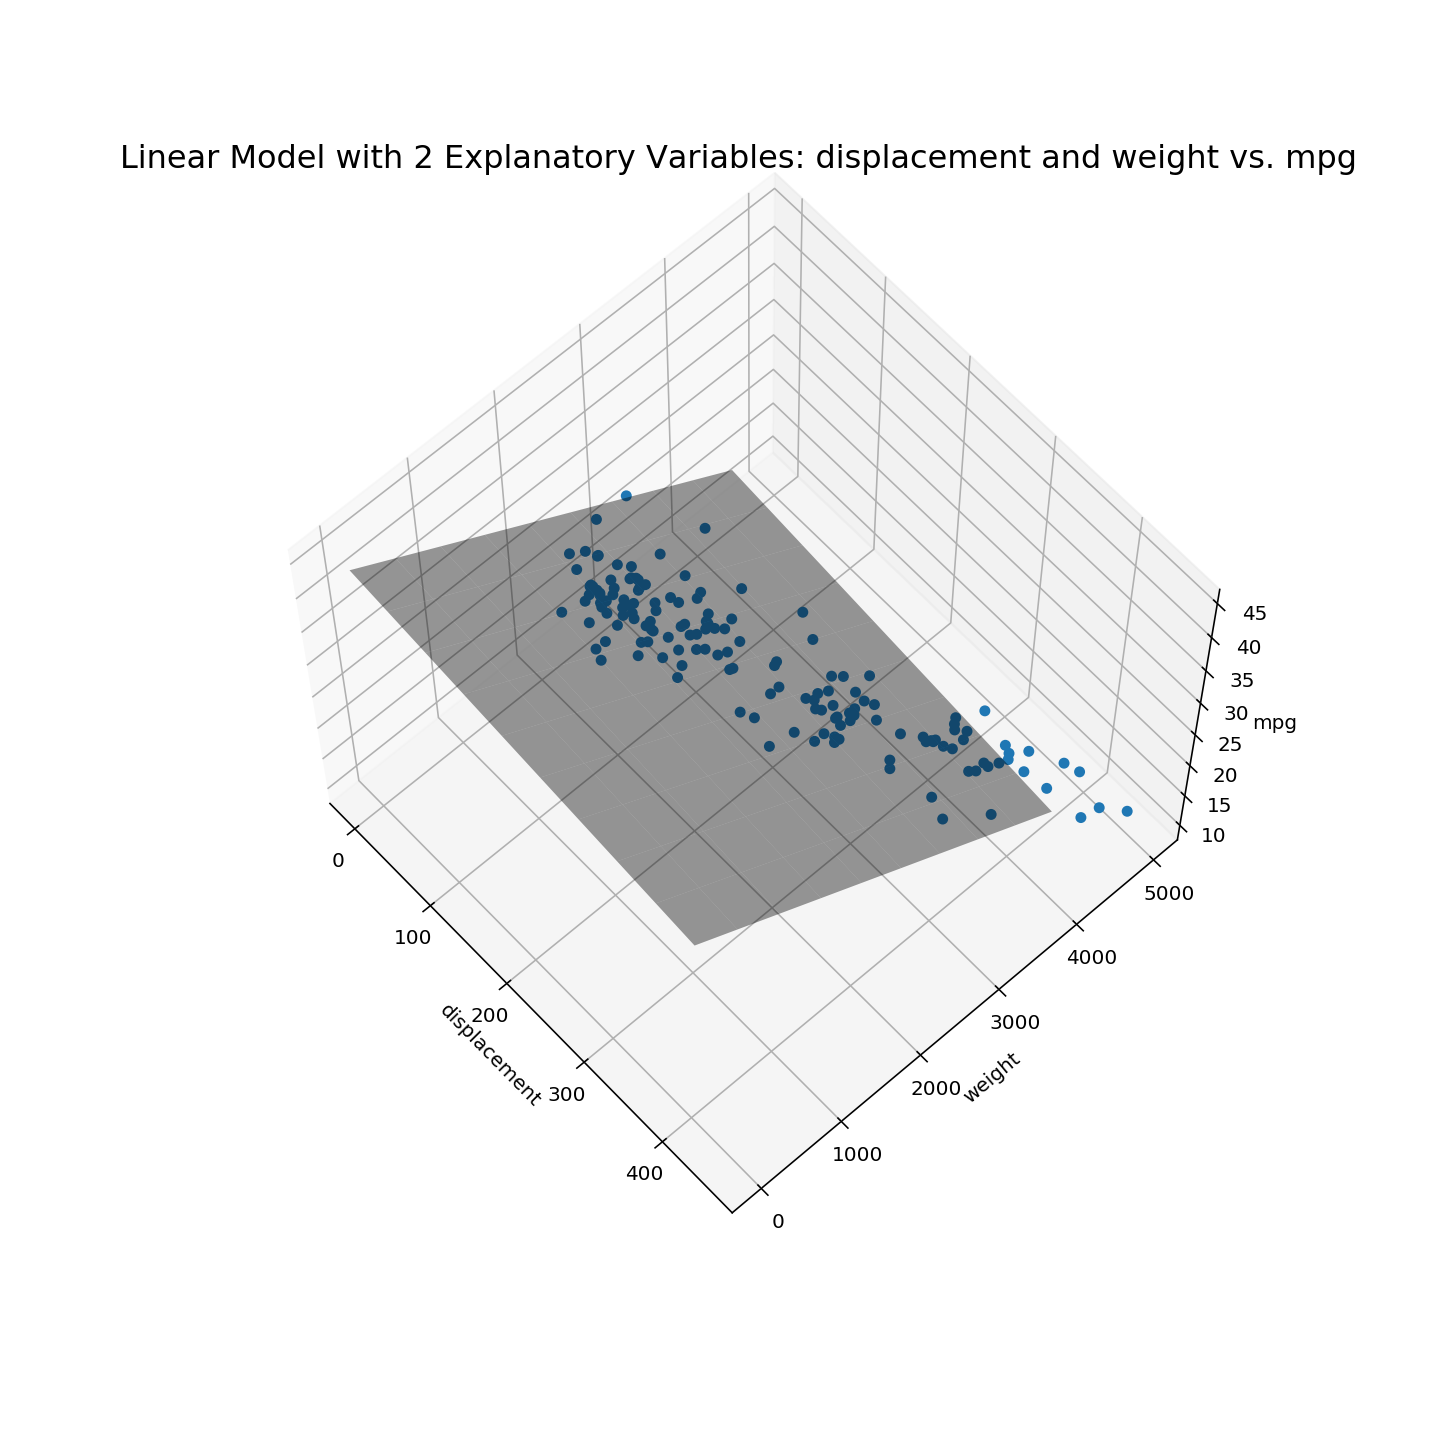

(100, 2)


In [63]:
%matplotlib notebook
plot_multiple_linear_regression(mpg_train, "displacement", "weight", "mpg")

In [64]:
%matplotlib inline

multiple_model = LinearRegression()
X3 = mpg_train[["displacement", "weight"]] # select both the displacement and weight columns from mpg_train
multiple_model.fit(X3, Y)

print("Multiple Linear Regression R^2:", multiple_model.score(X3, Y))

Multiple Linear Regression R^2: 0.71670085582


**Question**: Is this an $R^2$ value we want? WHy or why not?

In [65]:
dispX = mpg_train[["displacement"]] # select just displacement from mpg_train
wtX = mpg_train[["weight"]] # select just weight from mpg_train

linear_model.fit(dispX, Y)
print("Simple Linear Regression (displacement) R^2:", linear_model.score(dispX, Y))

linear_model.fit(wtX, Y)
print("Simple Linear Regression (weight) R^2:", linear_model.score(wtX, Y))

Simple Linear Regression (displacement) R^2: 0.660014662766
Simple Linear Regression (weight) R^2: 0.713396900352


**Question**: What do you notice about the $R^2$ values of the simple linear regression models and the multiple case?